# Seattle AirBnB dataset analysis

Seattle is a wonderful to visit, and AirBnB is a wonderful way to find a place to stay while visiting any place. Let's see what kind of insight I can gather for my next trip to Seattle from AirBnB's Seattle data.


## Procedures

* Explore the dataset
* Pose a few questions
* Clean the data to get ready for analysis
* Analyze the data to answer the questions
* Present graphics where needed

In [64]:
# import relevant packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns #unused
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#set up data path
#this is currently the path to access the data on kaggle, modify as needed
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/reviews.csv


In [65]:
#read in data
list_df=pd.read_csv('/kaggle/input/seattle/listings.csv')
review_df=pd.read_csv('/kaggle/input/seattle/reviews.csv')
date_df=pd.read_csv('/kaggle/input/seattle/calendar.csv')


### Explore Dataframes

First check the listings dataframe

In [66]:
print(list_df.shape)
list_df.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


The listing dataset has 92 columns that describe 3818 property listings

In [67]:
#what variables can we play with
list_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [68]:
#quick summary of data
list_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [69]:
#get an understanding of categorical and numerical data columns
list_df.select_dtypes('number').columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [70]:
list_df.describe(include='object')

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3641,3249,3818,3818,2786,2212,2884,...,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3818,1,3792,3478,3119,3742,1,2506,1999,2574,...,1,1,984,321,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/6658052,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,...,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,1,3818,3,15,14,10,3818,17,39,32,...,3818,3818,25,94,3818,3818,3227,1417,3497,3443


Next, check the dataframe containing reviews

In [71]:
print(review_df.shape)
review_df.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


almost 85000 comments on the listings in the previous dataset

In [72]:
review_df.describe(include='object')

,date,reviewer_name,comments
count,84849,84849,84831
unique,1930,14380,84136
top,2015-09-21,David,The host canceled this reservation the day bef...
freq,580,870,57


Third, review the calendar dataframe

In [73]:
print(date_df.shape)
date_df.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [74]:
date_df.describe(include='object')

,date,available,price
count,1393570,1393570,934542
unique,365,2,669
top,2016-02-11,t,$150.00
freq,3818,934542,36646


In [75]:
print('first date in the dataset is '+date_df['date'].min()+' and last date is '+date_df['date'].max())

first date in the dataset is 2016-01-04 and last date is 2017-01-02


The calendar dataset contains when the properties are available and their pricing. Some prices are missing. They appear to be if the unit is unavailable Available is boolean but uses t,f instead. It looks like all of the data ares from one year, roughly the year of 2016

## What Problems am I interested in?
Based on my EDA, there are 3 questions that would be useful or interesting to me for my next trip to Seattle
1. What is the cheapest time to lodge in Seattle?
2. Where is the cheapest area to stay?
3. Can we predict prices with a model with decent accuracy?

Before answering the questions, the datasets have to be cleaned-up first

## Data Cleaning

First clean the listing dataframe

In [76]:
#which columns are not missing data
len(list_df.columns[list_df.isnull().sum()==0])

47

In [77]:
#how much data is missing per column
list_df[list_df.columns[list_df.isnull().sum()>0]].isnull().mean().sort_values()

beds                           0.000262
property_type                  0.000262
host_identity_verified         0.000524
host_has_profile_pic           0.000524
host_total_listings_count      0.000524
host_name                      0.000524
host_since                     0.000524
host_listings_count            0.000524
host_picture_url               0.000524
host_thumbnail_url             0.000524
host_is_superhost              0.000524
bedrooms                       0.001572
zipcode                        0.001833
host_location                  0.002095
bathrooms                      0.004191
summary                        0.046359
host_neighbourhood             0.078575
xl_picture_url                 0.083814
medium_url                     0.083814
thumbnail_url                  0.083814
neighbourhood                  0.108958
host_response_rate             0.136983
host_response_time             0.136983
space                          0.149031
last_review                    0.164222


Around 10 columns should be dropped due to too much missing data

Also, there is no missing data for price, our target variable


For finding the cheapest areas, I will need to group the data by neighbourhoods. Let's check if there is enough data for each neighbourhood

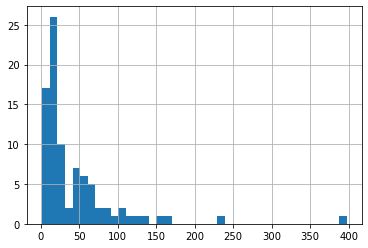

In [78]:
list_df['neighbourhood_cleansed'].value_counts().hist(bins=40)

some neighbourhoods don't have enough data, maybe that's why they also provided a "neighbourhood groups" column

In [79]:
list_df['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

It is better to analyze the neighbourhood groups, since there is much more data per group

In [80]:
#some columns have strange formatting and hey need to be fixed
def pricing_reformat(df_col):
    return df_col.str.strip('$').str.replace(',','').astype(float)

list_df['price']=pricing_reformat(list_df['price'])
list_df['extra_people']=pricing_reformat(list_df['extra_people'])

Check missing data for the reviews dataframe. I won't be using this dataframe going forward, so no cleaning is done

In [81]:
review_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

Now, clean the calendar data

In [82]:
# rows missing prices are not useful since I'm interested in pricing, so drop them
date_df2=date_df.dropna(subset=['price'])
date_df2.describe(include='object')

,date,available,price
count,934542,934542,934542
unique,365,1,669
top,2017-01-01,t,$150.00
freq,2922,934542,36646


In [83]:
# as expected, all rows with prices are for when the listing is available, so the avalability column isn't very useful
date_df2=date_df2.drop(['available'],axis=1)
date_df2.head()

,listing_id,date,price
0,241032,2016-01-04,$85.00
1,241032,2016-01-05,$85.00
9,241032,2016-01-13,$85.00
10,241032,2016-01-14,$85.00
14,241032,2016-01-18,$85.00


In [84]:
# I want to analyze pricing by month and by date, create relevant columns
y_md=date_df2['date'].str.split('-',expand=True,n=1)
date_df2=date_df2.assign(monthday=y_md[1], month=y_md[1].str.split('-',expand=True)[0].astype(int))
date_df2['price']=pricing_reformat(date_df2['price'])

date_df2.head()

,listing_id,date,price,monthday,month
0,241032,2016-01-04,85.0,01-04,1
1,241032,2016-01-05,85.0,01-05,1
9,241032,2016-01-13,85.0,01-13,1
10,241032,2016-01-14,85.0,01-14,1
14,241032,2016-01-18,85.0,01-18,1


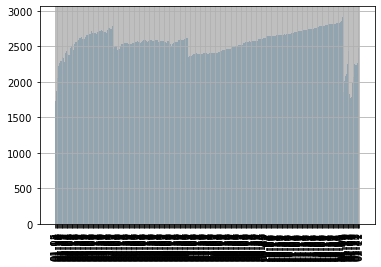

In [85]:
#need to check there are enough data for each month and each date
date_df2['monthday'].hist(bins=365,xrot=90)

OK there should be enough data points per date to make reasonable conclusions

For modeling to answer my 3rd question, it is best to increase the number of data points. To do this, I can merge list_df and model_df based on their listing IDs

In [86]:
list_df=list_df.rename(index=str, columns={'id':'listing_id'})
model_df = pd.merge(date_df2, list_df, on = 'listing_id')
model_df.shape

(934542, 96)

We get significantly more data to work with

In [87]:
### drop columns

#these cols have way too many missing numbers to be predictive
drop_cols=['cleaning_fee','neighborhood_overview','notes','weekly_price','security_deposit','monthly_price','square_feet','license']
model_df=model_df.drop(drop_cols, axis=1)

#to reduce dimensionality of the problem, I decided to drop the following columns
drop_cols = ['listing_id', 'monthday','date', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name','host_since', 'host_response_rate',
       'host_location', 'host_about', 'host_response_time','city','state',
        'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
        'zipcode', 'market', 'transit',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact',  'room_type', 'bed_type', 'amenities', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'first_review', 'last_review',  'requires_license',
        'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month','price_y']
model_df=model_df.drop(drop_cols, axis=1)

In [88]:
#drop any row with missing price
model_df.dropna(subset=['price_x'])

#split response column
y=model_df['price_x']
model_df=model_df.drop(['price_x'],axis=1)

#fill missing vals for numerical variables
num_cols=model_df.select_dtypes(include=['float','int']).columns
for col in num_cols:
    model_df[col].fillna(model_df[col].median(), inplace=True)

#dummy variables for categorical variables
cat_cols=model_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    model_df=pd.concat([model_df.drop(col, axis=1), pd.get_dummies(model_df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)

model_df.head()

,month,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,...,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,1,4,1.0,1.0,1.0,2,5.0,207,95.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,1.0,1.0,1.0,2,5.0,207,95.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,1.0,1.0,1.0,2,5.0,207,95.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,1.0,1.0,1.0,2,5.0,207,95.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,1.0,1.0,1.0,2,5.0,207,95.0,10.0,...,0,0,0,0,0,0,0,0,0,0


# Analysis
## Q1: Cheapest Time to visit Seattle

Approach:
* group by month and calculate average price
* group by date and calculate average price
* plot the results

The results will show the cheapest month and dates

In [89]:
#calculate monthly and daily price averages
monthly_prices=date_df2.groupby(['month'], as_index=False, group_keys=False)['price']
daily_prices=date_df2.groupby(['monthday'], as_index=False, group_keys=False)['price']
monthly_avg=monthly_prices.mean()
daily_avg=daily_prices.mean()
daily_avg

,monthday,price
0,01-01,138.126968
1,01-02,135.572767
2,01-04,122.085879
3,01-05,120.681307
4,01-06,120.928258
...,...,...
360,12-27,137.204168
361,12-28,137.177197
362,12-29,138.045503
363,12-30,144.738380


Text(0.5, 1.0, 'average price by month')

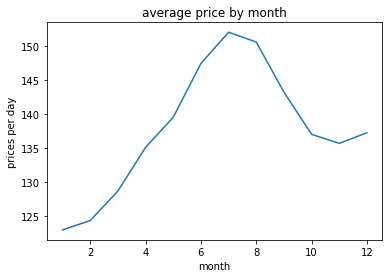

In [90]:
%matplotlib inline
plt.plot(monthly_avg['month'],monthly_avg['price'])
plt.xlabel('month')
plt.ylabel('prices per day')
plt.title('average price by month')



In [91]:
print(f'the cheapest month is January with average price of ${monthly_avg.price.min():.2f}')
print(f'the most expensive month is July with average price of ${monthly_avg.price.max():.2f}')

the cheapest month is January with average price of $122.91
the most expensive month is July with average price of $152.09


Text(0.5, 1.0, 'average price by date')

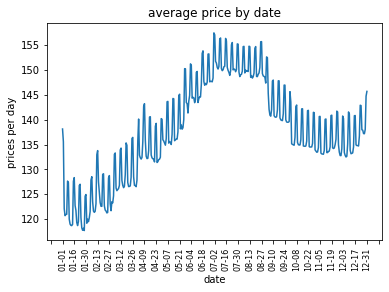

In [92]:

fig, ax = plt.subplots()
ax.plot(daily_avg['monthday'],daily_avg['price'])
plt.xlabel('date')
plt.xticks(rotation=90, fontsize=8)
loc = plticker.MultipleLocator(base=14.0) 
ax.xaxis.set_major_locator(loc)
plt.ylabel('prices per day')
plt.title('average price by date')

In [93]:
max_val=daily_avg['price'].max()
max_date=daily_avg.iloc[daily_avg['price'].argmax()].monthday
min_val=daily_avg['price'].min()
min_date=daily_avg.iloc[daily_avg['price'].argmin()].monthday
print(f'maximum daily average prices is ${max_val:.2f} on {max_date}')
print(f'minimum daily average prices is ${min_val:.2f} on {min_date}')

maximum daily average prices is $157.48 on 07-01
minimum daily average prices is $117.69 on 01-28


There are spikes in the prices is due to the weekends. I want to get a better sense of how prices change week to week. To do so, I apply a rolling average of 7 days to smooth things over.

In [94]:
daily_avg_smooth=daily_avg.rolling(7, center=True).mean()  
daily_avg_smooth.head()

,price
0,NaN
1,NaN
2,NaN
3,126.570704
4,125.028397


We are loosing a bit of data at the beginning and end of the year, but they shouldn't affect our results too much

Text(0.5, 1.0, 'average price by date')

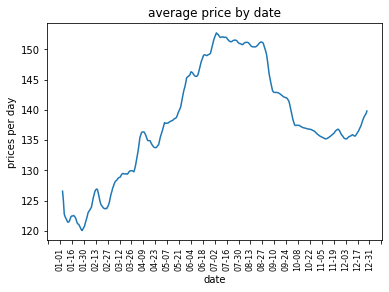

In [95]:
fig, ax = plt.subplots()
ax.plot(daily_avg['monthday'],daily_avg_smooth['price'])
plt.xlabel('date')
plt.xticks(rotation=90, fontsize=8)
loc = plticker.MultipleLocator(base=14.0) 
ax.xaxis.set_major_locator(loc)
plt.ylabel('prices per day')
plt.title('average price by date')


In [96]:
max_val=daily_avg_smooth['price'].max()
max_date=daily_avg.iloc[daily_avg_smooth['price'].argmax()].monthday
min_val=daily_avg_smooth['price'].min()
min_date=daily_avg.iloc[daily_avg_smooth['price'].argmin()].monthday
print(f'maximum daily average prices is ${max_val:.2f} in the week +/-3 days around {max_date}')
print(f'minimum daily average prices is ${min_val:.2f} in the week +/-3 days around {min_date}')

maximum daily average prices is $152.74 in the week +/-3 days around 07-04
minimum daily average prices is $120.07 in the week +/-3 days around 01-28


Peak prices are actually centered around July 4th (Independence Day in Seattle), especially since in 2016 July 4th was on a Monday, making it a long weekend that many people would want to travel. On the other hand, late January is when prices fall to its minimum

## Question 2: cheapest area

Approach
* Group listings by neighbourhoods and find average price for each area

The results will show which areas are the cheapest to stay

In [97]:
area_prices=list_df.groupby(['neighbourhood_group_cleansed'], as_index=False, group_keys=False)['price']
area_avg=area_prices.mean().sort_values(['price'])
area_avg

,neighbourhood_group_cleansed,price
5,Delridge,83.278481
10,Northgate,88.550000
13,Rainier Valley,91.899371
8,Lake City,92.671642
15,University District,93.639344
1,Beacon Hill,94.669492
14,Seward Park,108.477273
7,Interbay,109.727273
11,Other neighborhoods,119.968514
0,Ballard,124.682609


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

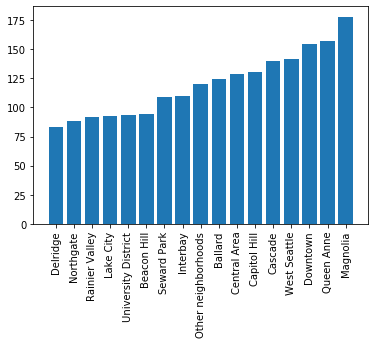

In [98]:
plt.bar(area_avg['neighbourhood_group_cleansed'],area_avg['price'])
plt.xticks(rotation=90)

This makes it clear the cheapest places to lodge is Delridge, followed closely by Northgate, Rainier Valley, Lake City, University District, and Beacon Hill

Those most expensive place, and by a significant margin, is Magnolia.

## Q3: predictive modelling

Now I want to create a model to help us predict the daily prices of AirBnB listings in Seattle.

I used the random forest regression model and the r2 and MSE criteria to evaluation


In [99]:

## modelling
X_train, X_test, y_train, y_test = train_test_split(model_df, y, test_size = 0.2, random_state=7)
#lin_model = LinearRegression(normalize=True) # Instantiate
rf_model = RandomForestRegressor(n_estimators=150, 
                               criterion='mse', random_state=7, n_jobs=-1)

rf_model.fit(X_train, y_train) #Fit

result_train = rf_model.predict(X_train)
result_test = rf_model.predict(X_test)
    
test_score = r2_score(y_test, result_test)
train_score= r2_score(y_train, result_train)

print('R2 test score: '+str(test_score))
print('R2 train score: '+str(train_score))

R2 test score: 0.9711669003866291
R2 train score: 0.9745509924483945


In [100]:
test_score = mean_squared_error(y_test, result_test)
train_score= mean_squared_error(y_train, result_train)

print('MSE test score: '+str(test_score))
print('MSE train score: '+str(train_score))

MSE test score: 322.0633460880177
MSE train score: 280.07302108367037


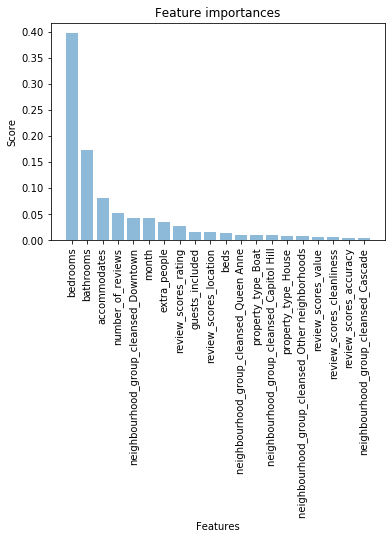

In [101]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rf_model.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:20]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:20]

#plot feature importances
plt.figure()
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances')
 
plt.show()

Not too surprisingly, the most important determinants of price are the size and location of the property. Time of the year and the number of reviews also influences price.

